In [2]:
pip install magpylib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import magpylib as magpy #note - all magpy units are SI (A, m, T, etc.)
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

generated new fontManager


In [4]:
I_bias

NameError: name 'I_bias' is not defined

In [5]:
# Define constants and variables

I_quad = 14.178#14.178#2.919
I_bias = 4.17*3.4 - (0.5*1.46)#4.014 

n_quad = 10 # 4.17A * Voltage
n_bias = 18 

t = 560e-6 #wire thickness

d_quad = 15e-3 + t #add t to actual diameter because wire in magpylib is infinitely thin
d_bias = 14e-3 + t

x_quad = 0
x_bias = 18.5e-3

y_quad = 0
y_bias = 0

z_sep = 17.7e-3 + t #add t to actual sep because wire is infinitely thin. 1st turn of wire at z_start translates to 1st turn at z_start + t/2 in code. 

z_top = z_sep/2 #coilA and coilC are along z+
z_bot = -z_sep/2 #coilB and coilD are along z-
#A, B = quad; C,D = bias

#defining range of co ordinates to plot magnetic field magnitudes over
x_coords = np.linspace(-1e-2, 1e-2, 500)
y_coords = np.linspace(-5e-4, 5e-4, 500)
z_coords = np.linspace(-5e-4, 5e-4, 500)

bohr_magneton = 9.274009994e-24  # Bohr magneton in J/T
m = 6.68e-27  # mass of 4He in kg

num_segments = 100 #number of segments/points for the construction of each turn, greater num_segments - smoother turns
tot_quad_turn = n_quad + 2/3 #adding the extra 2/3rd turn
tot_bias_turn = n_bias + 2/3 


In [176]:
#COIL A IS CLOCKWISE WOUND, CURRENT IS CLOCKWISE

#create coilA

A_x_ver = []
A_y_ver = []
A_z_ver = []

A_start_angle = 3*np.pi/2 #angle at which A starts winding wrt x axis

for i in range(int(tot_quad_turn)):
    A_theta_start = A_start_angle - 2 * np.pi * i
    A_theta_end = A_start_angle - 2 * np.pi * (i + 1)
    A_theta = np.linspace(A_theta_start, A_theta_end, num_segments)

   # Calculate z for this turn
    Az = np.linspace(z_top + i * t, z_top + (i + 1) * t, num_segments)
        
        # Calculate x and y values for this turn
    Ax = (d_quad / 2) * np.cos(A_theta) + x_quad
    Ay = (d_quad / 2) * np.sin(A_theta) + y_quad
        
        # Append values to the lists
    A_x_ver.extend(Ax)
    A_y_ver.extend(Ay)
    A_z_ver.extend(Az)

extra_turns = 2/3
A_theta_start = A_start_angle - 2 * np.pi * n_quad
A_theta_end = A_start_angle - 2 * np.pi * (n_quad + extra_turns)
A_theta_extra = np.linspace(A_theta_start, A_theta_end, num_segments)
A_z_extra = np.linspace(z_top + n_quad * t, z_top + (n_quad + extra_turns) * t, num_segments)
A_x_extra = (d_quad / 2) * np.cos(A_theta_extra) + x_quad
A_y_extra = (d_quad / 2) * np.sin(A_theta_extra) + y_quad
    
# Append the extra turn to the lists
A_x_ver.extend(A_x_extra)
A_y_ver.extend(A_y_extra)
A_z_ver.extend(A_z_extra)
    
# Combine x, y, and z into vertex positions
A_vertices = np.column_stack((A_x_ver, A_y_ver, A_z_ver))

coilA = magpy.current.Polyline(current = I_quad, vertices = A_vertices)
#coilA.show()

In [177]:
#COIL B FINAL AND CORRECT! COIL B IS ANTI-CLOCKWISE WOUND, CURRENT IS ANTI-CLOCKWISE
#create coilB

B_x_ver = []
B_y_ver = []
B_z_ver = []

B_start_angle = np.pi/2 #angle at which B starts winding wrt x axis

for i in range(int(tot_quad_turn)):
    B_theta_start = B_start_angle + 2 * np.pi * i
    B_theta_end = B_start_angle + 2 * np.pi * (i + 1)
    B_theta = np.linspace(B_theta_start, B_theta_end, num_segments)

   # Calculate z for this turn
    Bz = np.linspace(z_bot - i * t, z_bot - (i + 1) * t, num_segments)
        
        # Calculate x and y values for this turn
    Bx = (d_quad / 2) * np.cos(B_theta) + x_quad
    By = (d_quad / 2) * np.sin(B_theta) + y_quad
        
        # Append values to the lists
    B_x_ver.extend(Bx)
    B_y_ver.extend(By)
    B_z_ver.extend(Bz)

extra_turns = 2/3
B_theta_start = B_start_angle + 2 * np.pi * n_quad
B_theta_end = B_start_angle + 2 * np.pi * (n_quad + extra_turns)
B_theta_extra = np.linspace(B_theta_start, B_theta_end, num_segments)
B_z_extra = np.linspace(z_bot - n_quad * t, z_bot - (n_quad + extra_turns) * t, num_segments)
B_x_extra = (d_quad / 2) * np.cos(B_theta_extra) + x_quad
B_y_extra = (d_quad / 2) * np.sin(B_theta_extra) + y_quad
    
# Append the extra turn to the lists
B_x_ver.extend(B_x_extra)
B_y_ver.extend(B_y_extra)
B_z_ver.extend(B_z_extra)
    
# Combine x, y, and z into vertex positions
B_vertices = np.column_stack((B_x_ver, B_y_ver, B_z_ver))

coilB = magpy.current.Polyline(current = I_quad, vertices = B_vertices)
#coilB.show()

In [178]:
#COIL C FINAL AND CORRECT! COIL C IS ANTI-CLOCKWISE WOUND, CURRENT IS CLOCKWISE

#create coilC

C_x_ver = []
C_y_ver = []
C_z_ver = []

C_start_angle = 3*np.pi/2 #angle at which C starts winding wrt x axis

for i in range(int(tot_bias_turn)):
    C_theta_start = C_start_angle + 2 * np.pi * i
    C_theta_end = C_start_angle + 2 * np.pi * (i + 1)
    C_theta = np.linspace(C_theta_start, C_theta_end, num_segments)

   # Calculate z for this turn
    Cz = np.linspace(z_top + i * t, z_top + (i + 1) * t, num_segments)
        
        # Calculate x and y values for this turn
    Cx = (d_bias / 2) * np.cos(C_theta) + x_bias
    Cy = (d_bias / 2) * np.sin(C_theta) + y_bias
        
        # Append values to the lists
    C_x_ver.extend(Cx)
    C_y_ver.extend(Cy)
    C_z_ver.extend(Cz)

extra_turns = 2/3
C_theta_start = C_start_angle + 2 * np.pi * n_bias
C_theta_end = C_start_angle + 2 * np.pi * (n_bias + extra_turns)
C_theta_extra = np.linspace(C_theta_start, C_theta_end, num_segments)
C_z_extra = np.linspace(z_top + n_bias * t, z_top + (n_bias + extra_turns) * t, num_segments)
C_x_extra = (d_bias / 2) * np.cos(C_theta_extra) + x_bias
C_y_extra = (d_bias / 2) * np.sin(C_theta_extra) + y_bias
    
# Append the extra turn to the lists
C_x_ver.extend(C_x_extra)
C_y_ver.extend(C_y_extra)
C_z_ver.extend(C_z_extra)
    
# Combine x, y, and z into vertex positions
C_vertices = np.column_stack((C_x_ver, C_y_ver, C_z_ver))

coilC = magpy.current.Polyline(current = -I_bias, vertices = C_vertices)
#coilC.show()

In [179]:
#COIL D FINAL AND CORRECT! COIL D IS CLOCKWISE WOUND, CURRENT IS ANTI-CLOCKWISE

#create coilD

D_x_ver = []
D_y_ver = []
D_z_ver = []

D_start_angle = np.pi/2 #angle at which D starts winding wrt x axis

for i in range(int(tot_bias_turn)):
    D_theta_start = D_start_angle - 2 * np.pi * i
    D_theta_end = D_start_angle - 2 * np.pi * (i + 1)
    D_theta = np.linspace(D_theta_start, D_theta_end, num_segments)

   # Calculate z for this turn
    Dz = np.linspace(z_bot - i * t, z_bot - (i + 1) * t, num_segments)
        
    # Calculate x and y values for this turn
    Dx = (d_bias / 2) * np.cos(D_theta) + x_bias
    Dy = (d_bias / 2) * np.sin(D_theta) + y_bias
        
    # Append values to the lists
    D_x_ver.extend(Dx)
    D_y_ver.extend(Dy)
    D_z_ver.extend(Dz)

extra_turns = 2/3
D_theta_start = D_start_angle - 2 * np.pi * n_bias
D_theta_end = D_start_angle - 2 * np.pi * (n_bias + extra_turns)
D_theta_extra = np.linspace(D_theta_start, D_theta_end, num_segments)
D_z_extra = np.linspace(z_bot - n_bias * t, z_bot - (n_bias + extra_turns) * t, num_segments)
D_x_extra = (d_bias / 2) * np.cos(D_theta_extra) + x_bias
D_y_extra = (d_bias / 2) * np.sin(D_theta_extra) + y_bias
    
# Append the extra turn to the lists
D_x_ver.extend(D_x_extra)
D_y_ver.extend(D_y_extra)
D_z_ver.extend(D_z_extra)
    
# Combine x, y, and z into vertex positions
D_vertices = np.column_stack((D_x_ver, D_y_ver, D_z_ver))

coilD = magpy.current.Polyline(current = -I_bias, vertices = D_vertices)
#coilD.show()

In [180]:
#extra in and out wires

len_ex_q = n_quad*t  #length of extra quad wire
len_ex_b = n_bias*t  #length of extra bias wire 
#note - only the portion of the wire in contact with the turns is considered. 
#for top coils - extra wire brings current into the coil
#for bottom coils - extra wire takes current out of the coil

#extra in A
ex_start_A1 = ((d_quad/2) * np.cos(3*np.pi/2) + x_quad, (d_quad/2) * np.sin(3*np.pi/2), z_top + len_ex_q)
ex_stop_A1 = ((d_quad/2) * np.cos(3*np.pi/2) + x_quad, (d_quad/2) * np.sin(3*np.pi/2), z_top)
ver_ex_A1 = np.array([ex_start_A1, ex_stop_A1])
ex_A1 = magpy.current.Polyline(current=I_quad, vertices=ver_ex_A1)

#extra in B
ex_start_B1 = ((d_quad/2) * np.cos(np.pi/2) + x_quad, (d_quad/2) * np.sin(np.pi/2), z_bot)
ex_stop_B1 = ((d_quad/2) * np.cos(np.pi/2) + x_quad, (d_quad/2) * np.sin(np.pi/2), z_bot - len_ex_q)
ver_ex_B1 = np.array([ex_start_B1, ex_stop_B1])
ex_B1 = magpy.current.Polyline(current=-I_quad, vertices=ver_ex_B1)

#extra in C
ex_start_C1 = ((d_bias/2) * np.cos(3*np.pi/2) + x_bias, (d_bias/2) * np.sin(3*np.pi/2), z_top + len_ex_b)
ex_stop_C1 = ((d_bias/2) * np.cos(3*np.pi/2) + x_bias, (d_bias/2) * np.sin(3*np.pi/2), z_top)
ver_ex_C1 = np.array([ex_start_C1, ex_stop_C1])
ex_C1 = magpy.current.Polyline(current=I_bias, vertices=ver_ex_C1)

#extra in D
ex_start_D1 = ((d_bias/2) * np.cos(np.pi/2) + x_bias, (d_bias/2) * np.sin(np.pi/2), z_bot)
ex_stop_D1 = ((d_bias/2) * np.cos(np.pi/2) + x_bias, (d_bias/2) * np.sin(np.pi/2), z_bot - len_ex_b)
ver_ex_D1 = np.array([ex_start_D1, ex_stop_D1])
ex_D1 = magpy.current.Polyline(current=-I_bias, vertices=ver_ex_D1)

coilA = magpy.Collection(coilA, ex_A1)
coilB = magpy.Collection(coilB, ex_B1)
coilC = magpy.Collection(coilC, ex_C1)
coilD = magpy.Collection(coilD, ex_D1)


In [181]:
Quad = magpy.Collection(coilA, coilB)
Bias = magpy.Collection(coilC, coilD)

BiQUIC = magpy.Collection(Quad, Bias)
BiQUIC.show()

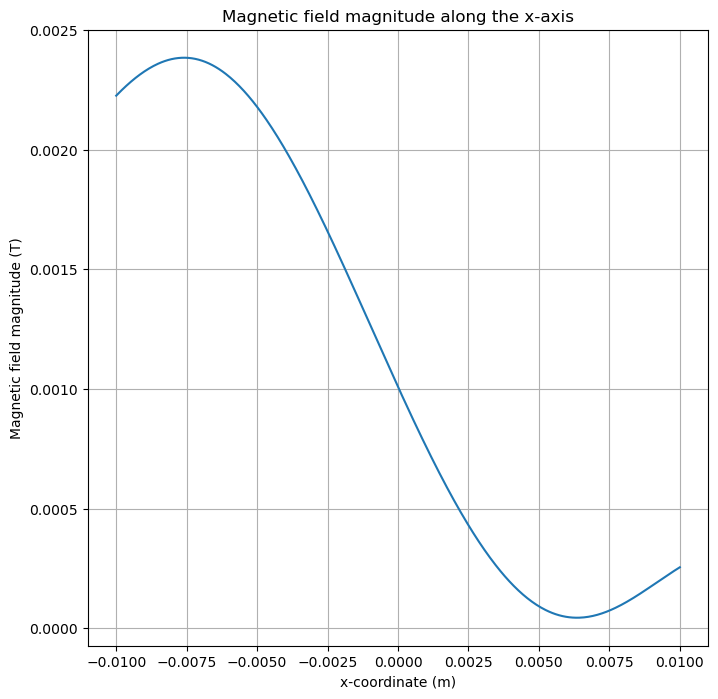

In [182]:
#plot magnitude of magnetic field along x axis

x_positions = np.array([[x, 0, 0] for x in x_coords])
B_fields_x = magpy.getB(BiQUIC, x_positions)
Bx_mag = np.sqrt(B_fields_x[:, 0]**2 + B_fields_x[:, 1]**2 + B_fields_x[:, 2]**2)
# Plot the original data, the fitted polynomial, and mark the local minimum
plt.figure(figsize=(8, 8))
plt.plot(x_coords, Bx_mag)
plt.xlabel('x-coordinate (m)')
plt.ylabel('Magnetic field magnitude (T)')
plt.title('Magnetic field magnitude along the x-axis')
# plt.legend()
plt.grid(True)
plt.show()

Local minimum at x-coordinate: 0.0064433731768308794


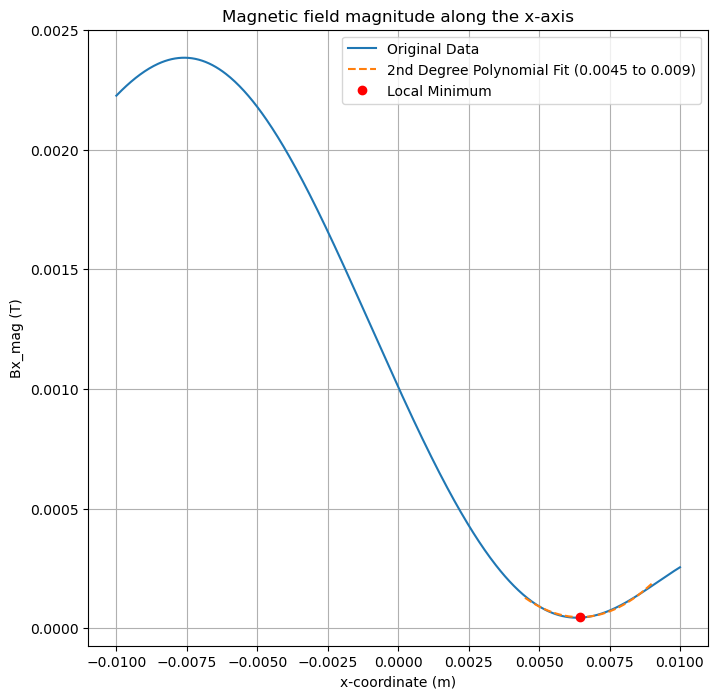

       2
21.44 x - 0.2763 x + 0.0009362


In [183]:
# |B| v/s x co-ordinate to find the offset point (from origin) of the magnetic field minima along x

x_positions = np.array([[x, 0, 0] for x in x_coords])
B_fields_x = magpy.getB(BiQUIC, x_positions)
Bx_mag = np.sqrt(B_fields_x[:, 0]**2 + B_fields_x[:, 1]**2 + B_fields_x[:, 2]**2)


# Select the range of x-coordinates to fit
x_min, x_max = 4.5e-3, 9e-3  # Adjust these values as needed after looking at the graph
x_mask = (x_coords >= x_min) & (x_coords <= x_max)
x_subset = x_coords[x_mask]
Bx_subset = Bx_mag[x_mask]

# Fit a 2nd-degree polynomial to the subset of data
x_coeffs = np.polyfit(x_subset, Bx_subset, 2)
px = np.poly1d(x_coeffs)

# Generate values for the fitted curve
x_fit = np.linspace(x_min, x_max, 500)
Bx_fit = px(x_fit)

# Calculate the first and second derivatives
polynomial_derivative = px.deriv()
polynomial_second_derivative = px.deriv(2)

# Find the roots of the first derivative
critical_points = fsolve(polynomial_derivative, x_subset)

# Verify the local minima and find the one with the lowest B value
Bx_minima = [point for point in critical_points if polynomial_second_derivative(point) > 0]
Bx_minimum = min(Bx_minima, key=lambda x: px(x))

# Print the local minimum
print("Local minimum at x-coordinate:", Bx_minimum)


# Plot the original data, the fitted polynomial, and mark the local minimum
plt.figure(figsize=(8, 8))
plt.plot(x_coords, Bx_mag, label='Original Data')
plt.plot(x_fit, Bx_fit, label=f'2nd Degree Polynomial Fit ({x_min} to {x_max})', linestyle='--')

# Mark the local minimum
plt.plot(Bx_minimum, px(Bx_minimum), 'ro', label='Local Minimum')  # Red dot for local minimum

plt.xlabel('x-coordinate (m)')
plt.ylabel('Bx_mag (T)')
plt.title('Magnetic field magnitude along the x-axis')
plt.legend()
plt.grid(True)
plt.show()

#print("Fitted x-polynomial equation:")
print(px)

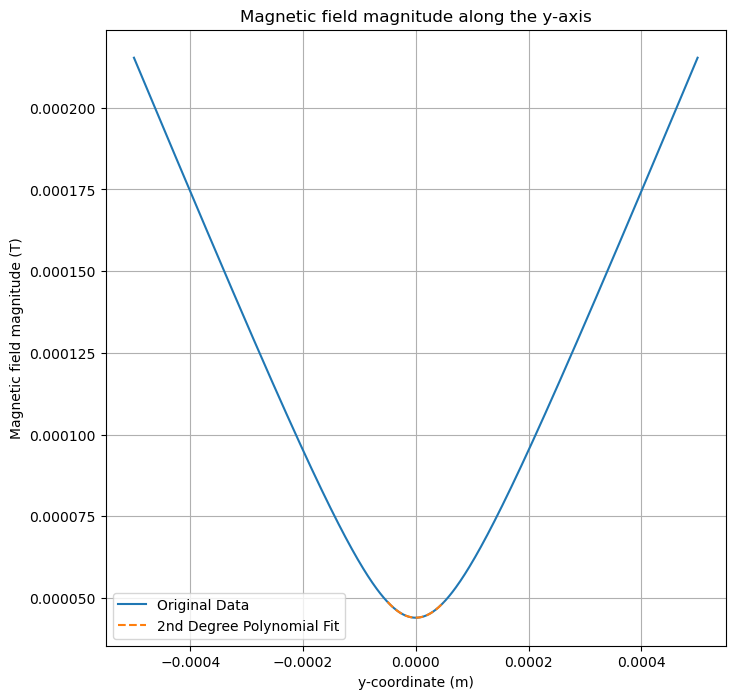

      2
1935 x + 5.537e-15 x + 4.4e-05


In [184]:
# Calculate the magnetic field along the y-axis
y_positions = np.array([[Bx_minimum, y, 0] for y in y_coords])
B_fields_y = magpy.getB(BiQUIC, y_positions)
By_mag = np.linalg.norm(B_fields_y, axis=1)


# Select the range of y-coordinates to fit
y_min, y_max = -5e-5, 5e-5 # Adjust these values as needed
y_mask = (y_coords >= y_min) & (y_coords <= y_max)
y_subset = y_coords[y_mask]
By_subset = By_mag[y_mask]

# Fit a 2nd-degree polynomial to the subset of data
y_coeffs = np.polyfit(y_subset, By_subset, 2)
py = np.poly1d(y_coeffs)

# Generate values for the fitted curve
y_fit = np.linspace(y_min, y_max, 500)
By_fit = py(y_fit)


# Plot the original data and the fitted curve
plt.figure(figsize=(8, 8))
plt.plot(y_coords, By_mag, label='Original Data')
plt.plot(y_fit, By_fit, label='2nd Degree Polynomial Fit', linestyle='--')
plt.xlabel('y-coordinate (m)')
plt.ylabel('Magnetic field magnitude (T)')
plt.title('Magnetic field magnitude along the y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(py)

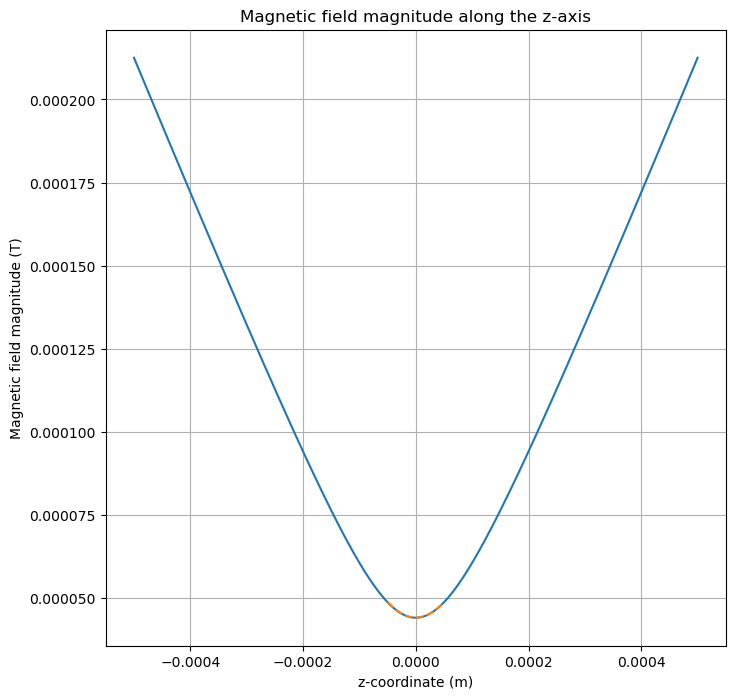

Fitted z-polynomial equation:
      2
1877 x - 8.252e-16 x + 4.399e-05


In [185]:
# Calculate the magnetic field along the z-axis
z_positions = np.array([[Bx_minimum, 0, z] for z in z_coords])
B_fields_z = magpy.getB(BiQUIC, z_positions)
Bz_mag = np.linalg.norm(B_fields_z, axis=1)


# Select the range of z-coordinates to fit
z_min, z_max = -5e-5, 5e-5  # Adjust these values as needed
z_mask = (z_coords >= z_min) & (z_coords <= z_max)
z_subset = z_coords[z_mask]
Bz_subset = Bz_mag[z_mask]

# Fit a 2nd-degree polynomial to the subset of data
z_coeffs = np.polyfit(z_subset, Bz_subset, 2)
pz = np.poly1d(z_coeffs)

# Generate values for the fitted curve
z_fit = np.linspace(z_min, z_max, 500)
Bz_fit = pz(z_fit)


# Plot the original data and the fitted curve
plt.figure(figsize=(8, 8))
plt.plot(z_coords, Bz_mag, label='Original Data')
plt.plot(z_fit, Bz_fit, label='2nd Degree Polynomial Fit', linestyle='--')
plt.xlabel('z-coordinate (m)')
plt.ylabel('Magnetic field magnitude (T)')
plt.title('Magnetic field magnitude along the z-axis')
# plt.legend()
plt.grid(True)
plt.show()


# Print the polynomial equation
print("Fitted z-polynomial equation:")
print(pz)

In [186]:

# Calculate angular trapping frequencies
omega_x = np.sqrt((4 * bohr_magneton * px[2]) / m)
omega_y = np.sqrt((4 * bohr_magneton * py[2]) / m)
omega_z = np.sqrt((4 * bohr_magneton * pz[2]) / m)
    
# Calculate trapping frequencies in Hz
fx = omega_x / (2 * np.pi)
fy = omega_y / (2 * np.pi)
fz = omega_z / (2 * np.pi)

# Print the results with formatted output
print('Angular trapping frequencies:')
print(f'    Along x: {omega_x:} rad/s')
print(f'    Along y: {omega_y:} rad/s')
print(f'    Along z: {omega_z:} rad/s')

print('\nTrapping frequencies (Hz):')
print(f'    Along x: {fx:} Hz')
print(f'    Along y: {fy:} Hz')
print(f'    Along z: {fz:} Hz')

Angular trapping frequencies:
    Along x: 345.03113930454424 rad/s
    Along y: 3278.1924132721765 rad/s
    Along z: 3228.1952631045915 rad/s

Trapping frequencies (Hz):
    Along x: 54.91341134094655 Hz
    Along y: 521.7405269786163 Hz
    Along z: 513.7832333889373 Hz


In [187]:
#Calculate field magnitude at trap bottom 

bx = np.array([Bx_minimum, 0, 0])
B_bx = BiQUIC.getB(bx)
B_bx_mag = np.sqrt(B_bx[0]**2 + B_bx[1]**2 + B_bx[2]**2)
print('trap bottom =', B_bx_mag*1e4, 'G')

trap bottom = 0.4397287230169536 G


Add Bias field

Local minimum at x-coordinate: 0.006121726244171719


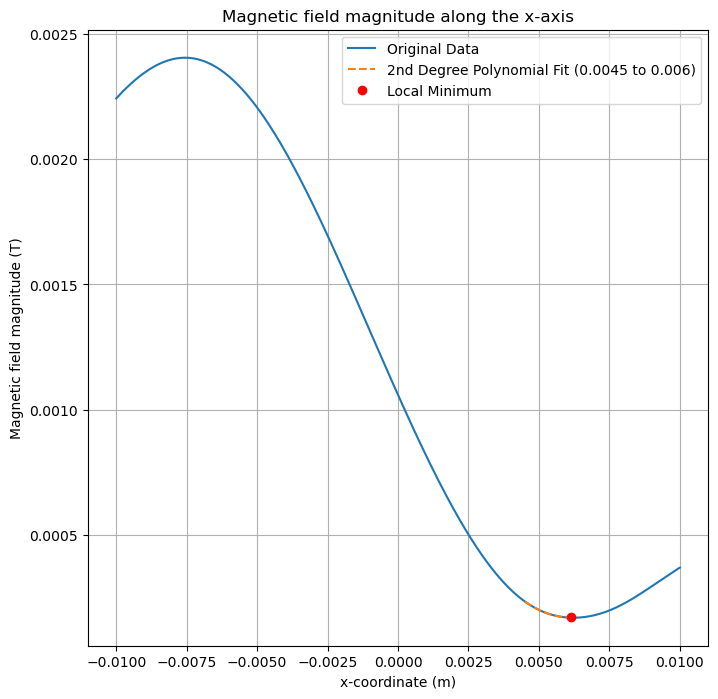

In [37]:
#add bias and plot Bmag vs x, y and z

# Define the offset magnetic field vector
B_offset = np.array([50.4e-8, 500.64e-8, -111e-6])

# Subtract the offset magnetic field from the BiQUIC field
Bx_new = B_fields_x + B_offset

# Calculate the magnitudes of the new magnetic field
Bx_mag_new = np.sqrt(Bx_new[:, 0]**2 + Bx_new[:, 1]**2 + Bx_new[:, 2]**2)

# Select the range of x-coordinates to fit
x_min_new, x_max_new = 4.5e-3, 6e-3  # Adjust these values as needed after looking at the graph
x_mask = (x_coords >= x_min_new) & (x_coords <= x_max_new)
x_subset = x_coords[x_mask]
Bxnew_subset = Bx_mag_new[x_mask]

# Fit a 2nd-degree polynomial to the subset of data
x_coeffs = np.polyfit(x_subset, Bxnew_subset, 2)
px_new = np.poly1d(x_coeffs)

# Generate values for the fitted curve
x_fit_new = np.linspace(x_min_new, x_max_new, 500)
Bxnew_fit = px_new(x_fit_new)

# Calculate the first and second derivatives
new_derivative = px_new.deriv()
new_second_derivative = px_new.deriv(2)

# Find the roots of the first derivative
critical_points = fsolve(new_derivative, x_subset)

# Verify the local minima and find the one with the lowest B value
Bxnew_minima = [point for point in critical_points if polynomial_second_derivative(point) > 0]
Bxnew_minimum = min(Bxnew_minima, key=lambda x: px(x))

# Print the local minimum
print("Local minimum at x-coordinate:", Bxnew_minimum)

# Plot the original data, the fitted polynomial, and mark the local minimum
plt.figure(figsize=(8, 8))
plt.plot(x_coords, Bx_mag_new, label='Original Data')
plt.plot(x_fit_new, Bxnew_fit, label=f'2nd Degree Polynomial Fit ({x_min} to {x_max})', linestyle='--')

# Mark the local minimum
plt.plot(Bxnew_minimum, px_new(Bxnew_minimum), 'ro', label='Local Minimum')  # Red dot for local minimum

plt.xlabel('x-coordinate (m)')
plt.ylabel('Magnetic field magnitude (T)')
plt.title('Magnetic field magnitude along the x-axis')
plt.legend()
plt.grid(True)
plt.show()

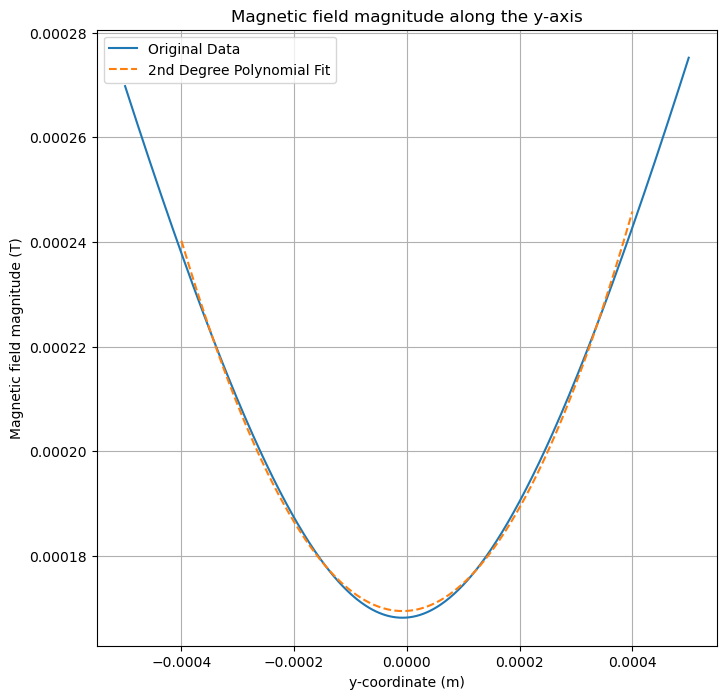

In [38]:
# Calculate the magnetic field along the y-axis

By_new = B_fields_y + B_offset
By_mag_new = np.sqrt(By_new[:, 0]**2 + By_new[:, 1]**2 + By_new[:, 2]**2)


# Select the range of y-coordinates to fit
y_min_new, y_max_new = -4e-4, 4e-4 # Adjust these values as needed
y_mask = (y_coords >= y_min_new) & (y_coords <= y_max_new)
y_subset = y_coords[y_mask]
Bynew_subset = By_mag_new[y_mask]

# Fit a 2nd-degree polynomial to the subset of data
y_coeffs = np.polyfit(y_subset, Bynew_subset, 2)
py_new = np.poly1d(y_coeffs)

# Generate values for the fitted curve
y_fit_new = np.linspace(y_min_new, y_max_new, 500)
Bynew_fit = py_new(y_fit_new)


# Plot the original data and the fitted curve
plt.figure(figsize=(8, 8))
plt.plot(y_coords, By_mag_new, label='Original Data')
plt.plot(y_fit_new, Bynew_fit, label='2nd Degree Polynomial Fit', linestyle='--')
plt.xlabel('y-coordinate (m)')
plt.ylabel('Magnetic field magnitude (T)')
plt.title('Magnetic field magnitude along the y-axis')
plt.legend()
plt.grid(True)
plt.show()


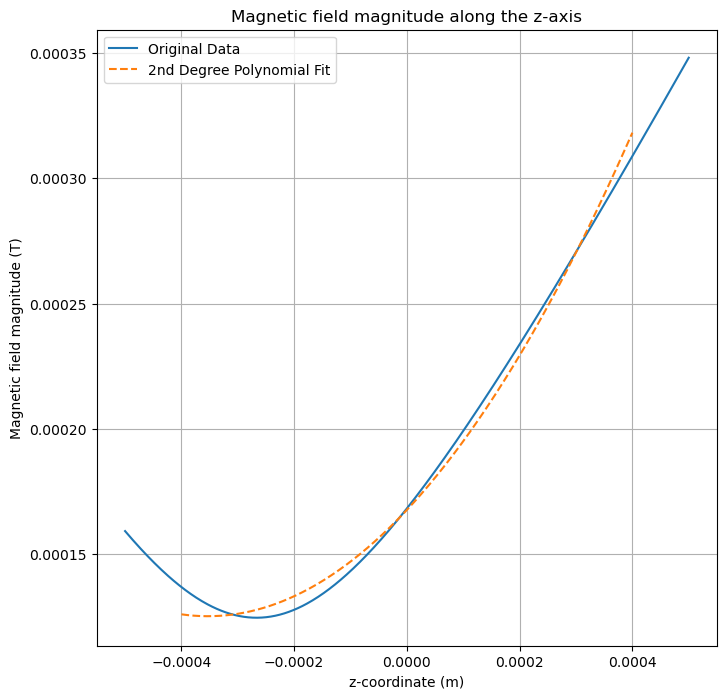

In [39]:
# Calculate the magnetic field along the z-axis

Bz_new = B_fields_z + B_offset
Bz_mag_new = np.sqrt(Bz_new[:, 0]**2 + Bz_new[:, 1]**2 + Bz_new[:, 2]**2)


# Select the range of z-coordinates to fit
z_min_new, z_max_new = -4e-4, 4e-4 # Adjust these values as needed
z_mask = (z_coords >= z_min_new) & (z_coords <= z_max_new)
z_subset = z_coords[z_mask]
Bznew_subset = Bz_mag_new[z_mask]

# Fit a 2nd-degree polynomial to the subset of data
z_coeffs = np.polyfit(z_subset, Bznew_subset, 2)
pz_new = np.poly1d(z_coeffs)

# Generate values for the fitted curve
z_fit_new = np.linspace(z_min_new, z_max_new, 500)
Bznew_fit = pz_new(z_fit_new)


# Plot the original data and the fitted curve
plt.figure(figsize=(8, 8))
plt.plot(z_coords, Bz_mag_new, label='Original Data')
plt.plot(z_fit_new, Bznew_fit, label='2nd Degree Polynomial Fit', linestyle='--')
plt.xlabel('z-coordinate (m)')
plt.ylabel('Magnetic field magnitude (T)')
plt.title('Magnetic field magnitude along the z-axis')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#new trapping frequencies 

a = px_new[2]
b = py_new[2]
c = pz_new[2]
print(a,b,c)

omega_x_new = np.sqrt((4 * bohr_magneton * a) / m)
omega_y_new = np.sqrt((4 * bohr_magneton * b) / m)
omega_z_new = np.sqrt((4 * bohr_magneton * c) / m)

print('New Angular trapping frequencies:')
print(f'    Along x: {omega_x_new:} rad/s')
print(f'    Along y: {omega_y_new:} rad/s')
print(f'    Along z: {omega_z_new:} rad/s')

fx_new = omega_x_new / (2 * np.pi)
fy_new = omega_y_new / (2 * np.pi)
fz_new = omega_z_new / (2 * np.pi)

print('\nNew Trapping frequencies (Hz):')
print(f'    Along x: {fx_new:} Hz')
print(f'    Along y: {fy_new:} Hz')
print(f'    Along z: {fz_new:} Hz')

24.137767903531536 459.41065897826 340.1775183788604
New Angular trapping frequencies:
    Along x: 366.12054293388934 rad/s
    Along y: 1597.2616992081137 rad/s
    Along z: 1374.4481102944621 rad/s

New Trapping frequencies (Hz):
    Along x: 58.26989417541699 Hz
    Along y: 254.2120948403314 Hz
    Along z: 218.75021077667822 Hz


In [41]:
#compare old and new trap frequencies and trap bottom

print(fx, fx_new)
print(fy, fy_new)
print(fz, fz_new)

print('old trap bottom =', B_bx_mag*1e4, 'G', ',', 'new trap bottom =', px_new(Bx_minimum)*1e4, 'G')

61.54336952680843 58.26989417541699
279.3783877493682 254.2120948403314
311.7433778332617 218.75021077667822
old trap bottom = 1.2684829397842092 G , new trap bottom = 1.6936855553497558 G


Pickling the trap

Pickle is a library used to import functions, objects, values etc from one notebook to another without having to define/calculate them again

In [33]:
import pickle

# Collect the necessary data and polynomials
plot_data = {
    
    'x_coords': x_coords,
    'y_coords': y_coords,
    'z_coords': z_coords,
    
    'x_min': x_min,
    'x_max': x_max,
    'y_min': y_min,
    'y_max': y_max,
    'z_min': z_min,
    'z_max': z_max,
    'x_min_new': x_min_new,
    'x_max_new': x_max_new,
    'y_min_new': y_min_new,
    'y_max_new': y_max_new,
    'z_min_new': z_min_new,
    'z_max_new': z_max_new,

    'Bx_minimum': Bx_minimum,
    'Bxnew_minimum': Bxnew_minimum,

    'Bx_mag': Bx_mag,
    'By_mag': By_mag,
    'Bz_mag': Bz_mag,
    'Bx_mag_new': Bx_mag_new,
    'By_mag_new': By_mag_new,
    'Bz_mag_new': Bz_mag_new,

    'px': px,
    'py': py,
    'pz': pz,
    'px_new': px_new,
    'py_new': py_new,
    'pz_new': pz_new,

    'x_fit': x_fit,
    'y_fit': y_fit,
    'z_fit': z_fit,
    'x_fit_new': x_fit_new,
    'y_fit_new': y_fit_new,
    'z_fit_new': z_fit_new,

    'Bx_fit': Bx_fit,
    'By_fit': By_fit,
    'Bz_fit': Bz_fit,
    'Bxnew_fit': Bxnew_fit,
    'Bynew_fit': Bynew_fit,
    'Bznew_fit': Bznew_fit,

    'fx': fx,
    'fy': fy,
    'fz': fz,
    'fx_new': fx_new,
    'fy_new': fy_new,
    'fz_new': fz_new,

    'tb': B_bx_mag*1e4,
    'tb_new': px_new(Bx_minimum)*1e4
    
}

# Save the BiQUIC trap and plot data to a file
with open('biquic_trap_and_graphs.pkl', 'wb') as file:
    pickle.dump({'trap': BiQUIC, 'plot_data': plot_data}, file)
